# Part 2. Plot results for comparison ranking and ROC AUC.
## Performed comparison step on hydrophobicity groups of 100 on the cluster. Make plots of this slurm output. Also, plot ROC AUC from compute descriptors. Match this to the list of hydrophobicity retroactively.

It seems like there is no significant difference between the hydrophobicity groups of 100. Get a statistical measure of this.

In [1]:
# Import packages
import os
import argparse
import time
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Import data
data_path = '../data/masif_testing/'
# Import comparison slurm output data and compute descriptors log
slurm_output_df = pd.read_csv(str(data_path + 'all_hydro_slurms.txt'), header = None)
# Import full hydrophobicty ranking

In [3]:
# Add proper column names, make new colums, split fields
slurm_output_df.rename(columns = {0:'Set and run'}, inplace=True)
slurm_output_df['Set and run'].replace({
    "slurm-8770439": "Low", "slurm-8771075": "Mid","slurm-8771086": "High"}, regex=True, inplace=True)

slurm_output_df = pd.DataFrame(
    slurm_output_df['Set and run'].str.split('.out:',1).tolist(), columns=['Hydrophobicity and run', 'League and ranking'])

slurm_output_df[['Hydrophobicity', 'Run']] = slurm_output_df[
    'Hydrophobicity and run'].str.split('_',1).tolist()
slurm_output_df.drop(columns=['Hydrophobicity and run'], inplace=True)
hydro_col = slurm_output_df.pop('Hydrophobicity')
run_col = slurm_output_df.pop('Run')

# Rearrange columns
slurm_output_df.insert(0, 'Hydrophobicity', hydro_col)
slurm_output_df.insert(1, 'Run', run_col)

# Separate ranking for plotting later
slurm_output_df['Ranking'] = slurm_output_df[
    'League and ranking'].apply(lambda x: x[-13:-11:]).tolist()

In [4]:
slurm_output_df['League'] = ''

In [5]:
slurm_output_df['League'][slurm_output_df['League and ranking'].str.match('Number in top 1 .')== True] = 'In top 1'
slurm_output_df['League'][slurm_output_df['League and ranking'].str.match('Number in top 10 .')== True] = 'In top 10'
slurm_output_df['League'][slurm_output_df['League and ranking'].str.match('Number in top 100 .')== True] = 'In top 100'

In [6]:
slurm_output_df

,Hydrophobicity,Run,League and ranking,Ranking,League
0,Low,1,Number in top 100 90 out of 100,90,In top 100
1,Low,1,Number in top 10 80 out of 100,80,In top 10
2,Low,1,Number in top 1 70 out of 100,70,In top 1
3,Low,1,Number in top 100 94 out of 100,94,In top 100
4,Low,1,Number in top 10 81 out of 100,81,In top 10
5,Low,1,Number in top 1 71 out of 100,71,In top 1
6,Low,2,Number in top 100 90 out of 100,90,In top 100
7,Low,2,Number in top 10 80 out of 100,80,In top 10
8,Low,2,Number in top 1 70 out of 100,70,In top 1
9,Low,2,Number in top 100 94 out of 100,94,In top 100


In [7]:
''' Because the input consists of 6 rows per for each slurm-output,
 we need to split these rows based on the number of decoys.
 3 rows for 100 decoys and 3 for 2000 decoys'''

# All 100 in decoys column first
slurm_output_df['Decoys'] = 100

# how many slurm runs in concatenated df?
df_iterations = len(slurm_output_df)/6

# Make list to slice rows with 2000 decoys in next cell
start_indeces = [3,4,5]
slice_list = []
for i in range(int(df_iterations)):
    slice_list.extend(start_indeces)
    start_indeces = tuple(x+6 for x in start_indeces)
    
# Change values in 'Decoy' column
slurm_output_df.loc[slice_list,'Decoys'] = 2000
slurm_output_df['Ranking'] = pd.to_numeric(slurm_output_df['Ranking'])

In [8]:
ttest,pval = ttest_ind(slurm_output_df[slurm_output_df["Hydrophobicity"]=="High"]['Ranking'],
                       slurm_output_df[slurm_output_df["Hydrophobicity"]=="Low"]['Ranking'])
print("p-value",pval)

p-value 0.05034922092823245


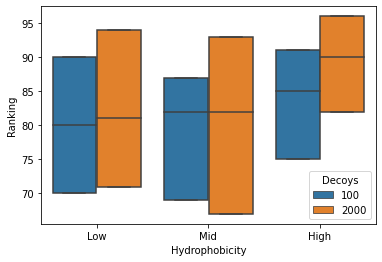

In [9]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Hydrophobicity", y="Ranking", hue = "Decoys", data=slurm_output_df)

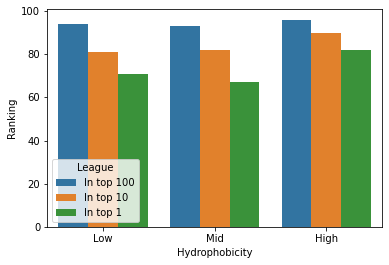

In [10]:
fig, ax = plt.subplots()
ax = sns.barplot(x="Hydrophobicity", y="Ranking", hue = "League", data=slurm_output_df[slurm_output_df['Decoys']==2000])

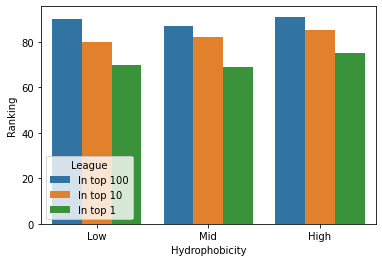

In [11]:
fig, ax = plt.subplots()
ax = sns.barplot(x="Hydrophobicity", y="Ranking", hue = "League", data=slurm_output_df[slurm_output_df['Decoys']==100])

In [12]:
# Ideas for plots:
# Scatterplot: hydrophobicity vs. ROC AUC


# Part 3. Plot results for ROC AUC.


In [30]:
# Import the dict and convert it to a df
data_path = '../data/masif_testing/'
F = open(str(data_path + 'interface_output_original_testing.txt'), "r")
X = F.readlines()

In [31]:
#Functions to read .txt and convert to a list of dicts
new_line_clipper = lambda x: x.replace("\n", "")
nan_replacer = lambda x: x.replace("nan", '"No result"' )
input_to_dict = lambda x: ast.literal_eval(x)

In [32]:
# Map function above to strings in list to convert to list of dicts
results = list(map(new_line_clipper, X))
results = list(map(nan_replacer, results))
results = list(map(input_to_dict, results))

In [33]:
# Convert to dataframe
results_df = pd.DataFrame(results, columns = ['Protein_pdb', 'Total_mean_hydrophobicity', 'Former_chains_hydrophobicity'])
results_df = results_df.applymap(lambda x: x[0])

In [34]:
# Now go back to nan, a bit annoying
results_df = results_df.replace('No result', np.nan)

In [35]:
# Convert to float to allow calculation and ranking
pd.to_numeric(results_df['Total_mean_hydrophobicity'], downcast = 'float')
pd.to_numeric(results_df['Former_chains_hydrophobicity'], downcast = 'float')
# Make column names better for plots, put 'nan' fields back
results_df.rename(columns = {"Total_mean_hydrophobicity": "Total hydrophobicity"}, inplace=True)
results_df.rename(columns = {"Former_chains_hydrophobicity": "Former hydrophobicity"}, inplace=True)

In [36]:
results_df

,Protein_pdb,Total hydrophobicity,Former hydrophobicity
0,1AN1_E_I,29.000000,49.000000
1,1AGQ_C_D,37.850000,32.300000
2,1AK4_A_D,41.500000,100.000000
3,1ACB_E_I,21.000000,49.000000
4,1A2W_A_B,21.282051,18.333333
...,...,...,...
852,4TQ1_A_B,38.690476,18.714286
853,4XL5_A_C,11.166667,23.666667
854,5AYS_A_C,24.333333,1.666667
855,5DMJ_A_B,46.000000,29.000000


In [37]:
# For our purposes, remove nans
results_df = results_df.dropna()

In [38]:
G = open(str(data_path + 'roc_auc_for_all.txt'), "r")
Y = G.readlines()

In [39]:
splitter_fun = lambda x: x.split('; num pos:')[0]
roc_remove = lambda x: x.replace(': ROC AUC:', ',')
str_splitter = lambda x: x.split(',')

In [40]:
ROC_results = list(map(splitter_fun, Y))
ROC_results = list(map(roc_remove, ROC_results))
ROC_results = list(map(str_splitter, ROC_results))
ROC_results = list(map(input_to_dict, ROC_results))

ValueError: malformed node or string: ['2BMA_C_B', ' 1.000000']

In [41]:
ROC_results_df = pd.DataFrame(ROC_results, columns=['Protein_pdb', 'ROC AUC'])

In [42]:
ROC_results_df

,Protein_pdb,ROC AUC
0,2BMA_C_B,1.000000
1,2X9A_A_D,0.940000
2,3TDM_A_B,0.973333
3,1J4U_A_B,1.000000
4,2GQS_A_B,0.973937
...,...,...
688,3SJ9_A_B,0.994083
689,3CEW_C_D,0.956294
690,1L4I_A_B,1.000000
691,1W1I_B_E,1.000000


In [43]:
full_results_df = pd.merge(ROC_results_df, results_df, how = 'inner')

In [62]:
full_results_df = full_results_df.dropna()

<AxesSubplot:xlabel='Total hydrophobicity', ylabel='ROC AUC'>

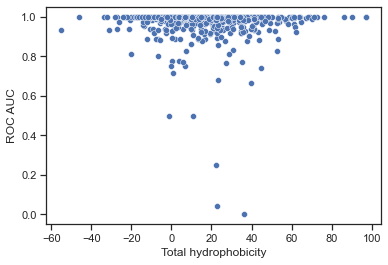

In [75]:
plt.clf()
sns.scatterplot(data=full_results_df,x="Total hydrophobicity", y="ROC AUC")

In [64]:
full_results_df=full_results_df.drop(["Protein_pdb"], axis =1)

KeyError: "['Protein_pdb'] not found in axis"

In [67]:
full_results_df['ROC AUC'] = pd.to_numeric(full_results_df['ROC AUC'], downcast = 'float')
pd.to_numeric(full_results_df['Total hydrophobicity'], downcast = 'float')
pd.to_numeric(full_results_df['Former hydrophobicity'], downcast = 'float')

0      26.400000
1     -19.200001
2      26.799999
3      40.250000
4      20.571428
         ...    
591    24.833334
592    14.200000
593    30.750000
594    51.000000
595   -31.000000
Name: Former hydrophobicity, Length: 596, dtype: float32

In [68]:
full_results_df['ROC AUC']

0      1.000000
1      0.940000
2      0.973333
3      1.000000
4      0.973937
         ...   
591    0.994083
592    0.956294
593    1.000000
594    1.000000
595    1.000000
Name: ROC AUC, Length: 596, dtype: float32

In [69]:
normalized_df=(full_results_df-full_results_df.min())/(full_results_df.max()-full_results_df.min())


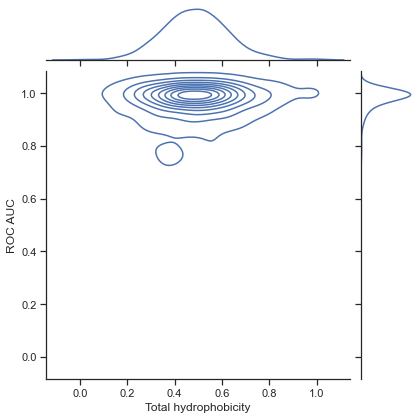

In [74]:
sns.set_theme(style="ticks")
sns.jointplot(x=normalized_df["Total hydrophobicity"], y=normalized_df["ROC AUC"], kind="kde")

In [72]:
from scipy.stats import pearsonr
corr, _ = pearsonr(full_results_df['Total hydrophobicity'], full_results_df['ROC AUC'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.012
